## 4.9　章末問題10

ランダムウォークメトロポリスヘイスティング法で勝率を予測
次の5試合で選手Aが選手Bに３勝２敗する確率とその標準偏差を求める。
なお、事後分布はp'=10.2, q'=5.8のベータ分布とする。

In [21]:
set.seed(1234)
qsd <- sqrt(0.1)   #提案分布の ＳＤ
sample_size <- 10^5    #sample size
bin <- 10^3        #burn-in period
x<-numeric(sample_size)  #サンプルサイズ数の配列作成
x[1]<-4.0 #初期値
co<-0 #採択数
for (t in 2:sample_size){
    a<-runif(1) #一様乱数
    # 移動前後で保存精度が十分高ければiステップ後の値として採択
    if (runif(1) < dbeta(a,10.2,5.8)/dbeta(x[t-1],10.2,5.8)) {
       x[t]<-a; #採択する 
       co<-co+1 
    }else{
       x[t]<-x[t-1]
    }
}

#採択率
print(round(co/sample_size,2))

[1] 0.38


採択率が38%と低めだがHMCを使えば改善される

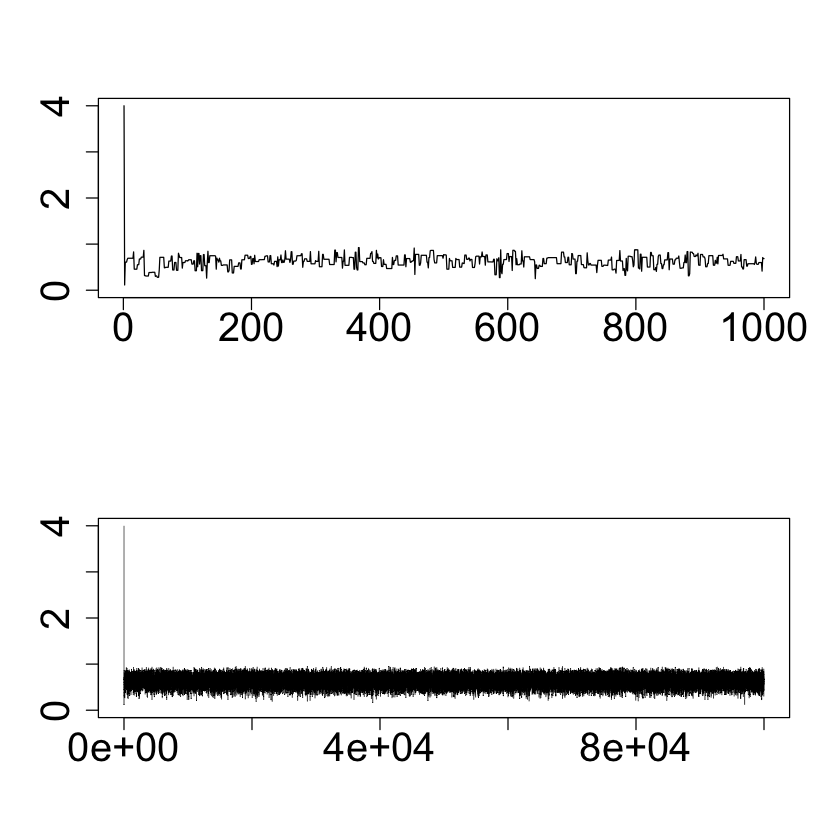

In [22]:
#trace line
par(mfrow=c(2,1))
#バーンイン(t<1000)までの図
plot(x[1:1000],type="l",ylab='',xlab='',lwd=1,ylim=c(0,4.0),cex.axis=2.0) 
#バーンイン後を含む図
plot(x,type="l",ylab='',xlab='',lwd=0.5,ylim=c(0,4.0),cex.axis=2.0) 
par(mfrow=c(1,1))

In [23]:
#EAP=実力θ
eap=round(mean(x[(bin+1):sample_size]),3) 
eap

[1] 0.638

In [24]:
#(2.21)よりベルヌーイ試行の結果が5回中3回勝つ確率は nCxθ^x(1-θ)^n-x ？？
choose(5, 3)*eap^3*(1-eap)^2

[1] 0.3403135

In [37]:
#パラメータの評価
f<-function(x){dbinom(3,5,x)}　#乱数xを二項分布の母数としてnCxθ^x(1-θ)^n-x を計算
lx<-length(x)
sx <- sort(f(x[(Bin+1):sample_size]))　#バーンイン期間を除いたx

#EAP推定量＝５試合で選手AがBに３勝２敗する確率
round(mean(sx),3)

[1] 0.295

In [8]:
#事後標準偏差
round(sd(sx),3)

[1] 0.058

次の５試合で選手AがBに３勝２敗する確率は29.6%, 事後標準偏差は0.58